In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
cd drive/My Drive/Colab Notebooks/experiments/data/lcc

/content/drive/My Drive/Colab Notebooks/experiments/data/lcc


In [2]:
!pip install pandas_read_xml

     |████████████████████████████████| 337kB 11.4MB/s 


In [3]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [6]:
import pandas_read_xml as pdx

df = pdx.read_xml('es_small.xml')

In [7]:
df = pdx.fully_flatten(df)

In [8]:
es_lcc = df[['LCC-Metaphor-SMALL|@targetConcept', 'LCC-Metaphor-SMALL|@type',
             'LCC-Metaphor-SMALL|Annotations|AffectAnnotations|IntensityAnnotations|IntensityAnnotation|@intensity',
             'LCC-Metaphor-SMALL|Annotations|AffectAnnotations|PolarityAnnotations|PolarityAnnotation|@polarity',
             'LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@score',
             'LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@sourceConcept',
             'LCC-Metaphor-SMALL|Annotations|MetaphoricityAnnotations|MetaphoricityAnnotation|@score',
             'LCC-Metaphor-SMALL|TextContent|Current|#text', 'LCC-Metaphor-SMALL|TextContent|Current|LmSource',
             'LCC-Metaphor-SMALL|TextContent|Current|LmTarget', 'LCC-Metaphor-SMALL|TextContent|Next', 'LCC-Metaphor-SMALL|TextContent|Prev']]
es_lcc

In [ ]:
es_lcc.head()

,LCC-Metaphor-SMALL|@targetConcept,LCC-Metaphor-SMALL|@type,LCC-Metaphor-SMALL|Annotations|AffectAnnotations|IntensityAnnotations|IntensityAnnotation|@intensity,LCC-Metaphor-SMALL|Annotations|AffectAnnotations|PolarityAnnotations|PolarityAnnotation|@polarity,LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@score,LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@sourceConcept,LCC-Metaphor-SMALL|Annotations|MetaphoricityAnnotations|MetaphoricityAnnotation|@score,LCC-Metaphor-SMALL|TextContent|Current|#text,LCC-Metaphor-SMALL|TextContent|Current|LmSource,LCC-Metaphor-SMALL|TextContent|Current|LmTarget,LCC-Metaphor-SMALL|TextContent|Next,LCC-Metaphor-SMALL|TextContent|Prev
0,TAXATION,SYSTEM_VALIDATIONS,3.0,NEGATIVE,0.0,BACKWARD_MOVEMENT,0.0,También cursan en su contra 22 procesos más po...,robo,impuestos,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s..."
1,TAXATION,SYSTEM_VALIDATIONS,3.0,POSITIVE,0.0,BACKWARD_MOVEMENT,0.0,También cursan en su contra 22 procesos más po...,robo,impuestos,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s..."
2,TAXATION,SYSTEM_VALIDATIONS,1.0,NEGATIVE,0.0,BACKWARD_MOVEMENT,0.0,También cursan en su contra 22 procesos más po...,robo,impuestos,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s..."
3,TAXATION,SYSTEM_VALIDATIONS,1.0,POSITIVE,0.0,BACKWARD_MOVEMENT,0.0,También cursan en su contra 22 procesos más po...,robo,impuestos,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s..."
4,TAXATION,SYSTEM_VALIDATIONS,3.0,NEGATIVE,0.0,BACKWARD_MOVEMENT,2.0,También cursan en su contra 22 procesos más po...,robo,impuestos,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s..."


In [9]:
es_lcc = es_lcc.rename(columns={'LCC-Metaphor-SMALL|@targetConcept': 'target_concept',
                                'LCC-Metaphor-SMALL|@type': 'type',
                                'LCC-Metaphor-SMALL|Annotations|AffectAnnotations|IntensityAnnotations|IntensityAnnotation|@intensity': 'intensity',
                                'LCC-Metaphor-SMALL|Annotations|AffectAnnotations|PolarityAnnotations|PolarityAnnotation|@polarity': 'polarity',
                                'LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@score': 'source_score',
                                'LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@sourceConcept': 'source_concept',
                                'LCC-Metaphor-SMALL|Annotations|MetaphoricityAnnotations|MetaphoricityAnnotation|@score': 'metaphoricity_score',
                                'LCC-Metaphor-SMALL|TextContent|Current|#text': 'sentence',
                                'LCC-Metaphor-SMALL|TextContent|Current|LmSource': 'lm_source',
                                'LCC-Metaphor-SMALL|TextContent|Current|LmTarget': 'lm_target',
                                'LCC-Metaphor-SMALL|TextContent|Next': 'text_context_next',
                                'LCC-Metaphor-SMALL|TextContent|Prev': 'text_context_prev'})

In [ ]:
es_lcc.to_csv('es_lcc.csv', index=False)

In [10]:
es_lcc_subset = es_lcc[['sentence', 'text_context_next', 'text_context_prev', 'metaphoricity_score', 'polarity', 'intensity', 'source_concept', 'target_concept']]

In [11]:
es_lcc_subset = es_lcc_subset.drop_duplicates(subset=None, keep='first', inplace=False)

In [12]:
es_lcc_subset.dropna()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
es_lcc_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20694 entries, 0 to 33986
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sentence             20682 non-null  object
 1   text_context_next    19515 non-null  object
 2   text_context_prev    19051 non-null  object
 3   metaphoricity_score  20693 non-null  object
 4   polarity             9414 non-null   object
 5   intensity            9414 non-null   object
 6   source_concept       9204 non-null   object
 7   target_concept       20693 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


In [14]:
es_lcc_subset.shape

(20694, 8)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


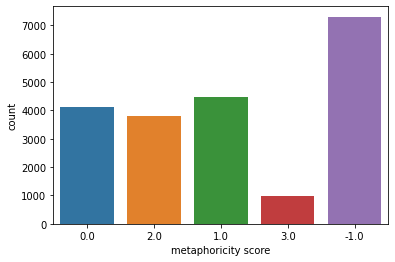

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(es_lcc_subset.metaphoricity_score)
plt.xlabel('metaphoricity score');

In [16]:
def met_multiclass(score):
  score = float(score)
  if score == -1.0:
    return 0
  elif score == 0:
    return 0
  elif score == 1: 
    return 1
  elif score == 2:
    return 1
  elif score == 3:
    return 1

es_lcc_subset['label'] = es_lcc_subset.metaphoricity_score.apply(met_multiclass)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


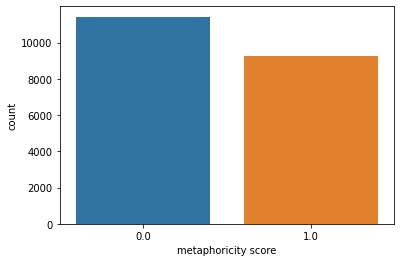

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(es_lcc_subset.label)
plt.xlabel('metaphoricity score');

In [ ]:
es_lcc_subset.isna().sum()

sentence                  13
next                    1179
prev                    1672
metaphoricity_score        1
polarity               11375
intensity              11375
source_concept         11585
target_concept             1
lm_source                  1
lm_target                  1
type                       1
label                      1
dtype: int64

In [18]:
import numpy as np
es_lcc_subset['label'] = es_lcc_subset['label'].fillna(0).astype(np.int64)

In [19]:
es_lcc_subset = es_lcc_subset.drop(['metaphoricity_score'], axis=1)

In [20]:
es_lcc_subset.head()

,sentence,text_context_next,text_context_prev,polarity,intensity,source_concept,target_concept,label
0,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",NEGATIVE,3.0,BACKWARD_MOVEMENT,TAXATION,0
1,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",POSITIVE,3.0,BACKWARD_MOVEMENT,TAXATION,0
2,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",NEGATIVE,1.0,BACKWARD_MOVEMENT,TAXATION,0
3,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",POSITIVE,1.0,BACKWARD_MOVEMENT,TAXATION,0
4,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",NEGATIVE,3.0,BACKWARD_MOVEMENT,TAXATION,1


In [21]:
es_lcc_subset.to_csv('es_lcc_new.csv', index=False)

In [22]:
es_lcc_new = pd.read_csv("es_lcc_new.csv")

In [23]:
es_lcc_new.head()

,sentence,text_context_next,text_context_prev,polarity,intensity,source_concept,target_concept,label
0,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",NEGATIVE,3.0,BACKWARD_MOVEMENT,TAXATION,0
1,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",POSITIVE,3.0,BACKWARD_MOVEMENT,TAXATION,0
2,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",NEGATIVE,1.0,BACKWARD_MOVEMENT,TAXATION,0
3,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",POSITIVE,1.0,BACKWARD_MOVEMENT,TAXATION,0
4,También cursan en su contra 22 procesos más po...,Esos 26 mil millones de pesos (que pagaron baj...,"Sin embargo, hay otro proceso que les podría s...",NEGATIVE,3.0,BACKWARD_MOVEMENT,TAXATION,1


In [ ]:
es_lcc_subset.to_csv('es_lcc_next.csv', index=False)

In [ ]:
lcc_cross = pd.concat([en_lcc_subset, es_lcc_subset], ignore_index=True)

In [ ]:
lcc_cross

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
lcc_cross.to_csv('lcc_cross_label.csv', index=False)